In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Example time series data (could be any time-based data)
np.random.seed(42)
data = np.random.randn(100) * 20 + 50  # Simulated data (normal distribution)
data[30] = 150  # Injecting an anomaly at index 30
data[15] = 4000  # Injecting an anomaly at index 15
data[60] = -100  # Injecting an anomaly at index 60
data[75] = -200  # Injecting an anomaly at index 75
data

array([ 5.99342831e+01,  4.72347140e+01,  6.29537708e+01,  8.04605971e+01,
        4.53169325e+01,  4.53172609e+01,  8.15842563e+01,  6.53486946e+01,
        4.06105123e+01,  6.08512009e+01,  4.07316461e+01,  4.06854049e+01,
        5.48392454e+01,  1.17343951e+01,  1.55016433e+01,  4.00000000e+03,
        2.97433776e+01,  5.62849467e+01,  3.18395185e+01,  2.17539260e+01,
        7.93129754e+01,  4.54844740e+01,  5.13505641e+01,  2.15050363e+01,
        3.91123455e+01,  5.22184518e+01,  2.69801285e+01,  5.75139604e+01,
        3.79872262e+01,  4.41661250e+01,  1.50000000e+02,  8.70455637e+01,
        4.97300555e+01,  2.88457814e+01,  6.64508982e+01,  2.55831270e+01,
        5.41772719e+01,  1.08065975e+01,  2.34362790e+01,  5.39372247e+01,
        6.47693316e+01,  5.34273656e+01,  4.76870344e+01,  4.39779261e+01,
        2.04295602e+01,  3.56031158e+01,  4.07872246e+01,  7.11424445e+01,
        5.68723658e+01,  1.47391969e+01,  5.64816794e+01,  4.22983544e+01,
        3.64615600e+01,  

In [19]:
# Create a DataFrame
df = pd.DataFrame(data, columns=['Value'])

In [20]:
# Calculate rolling mean and rolling standard deviation
window_size = 10  # You can adjust this based on your data's seasonality
df['Rolling_Mean'] = df['Value'].rolling(window=window_size).mean()
df['Rolling_Std'] = df['Value'].rolling(window=window_size).std()

In [21]:
df

,Value,Rolling_Mean,Rolling_Std
0,59.934283,NaN,NaN
1,47.234714,NaN,NaN
2,62.953771,NaN,NaN
3,80.460597,NaN,NaN
4,45.316933,NaN,NaN
...,...,...,...
95,20.729701,48.816089,15.345864
96,55.922406,47.577526,14.042329
97,55.221105,47.442134,13.952176
98,50.102269,48.511881,13.674806


In [22]:
# Calculate Z-score
df['Z-Score'] = (df['Value'] - df['Rolling_Mean']) / df['Rolling_Std']

# Set a Z-score threshold for anomaly detection (typically, threshold > 3 or < -3)
threshold = 3
df['Anomaly'] = df['Z-Score'].apply(lambda x: 1 if abs(x) > threshold else 0)

In [10]:
df

,Value,Rolling_Mean,Rolling_Std,Z-Score,Anomaly
0,59.934283,NaN,NaN,NaN,0
1,47.234714,NaN,NaN,NaN,0
2,62.953771,NaN,NaN,NaN,0
3,80.460597,NaN,NaN,NaN,0
4,45.316933,NaN,NaN,NaN,0
...,...,...,...,...,...
95,20.729701,48.816089,15.345864,-1.830225,0
96,55.922406,47.577526,14.042329,0.594266,0
97,55.221105,47.442134,13.952176,0.557545,0
98,50.102269,48.511881,13.674806,0.116301,0


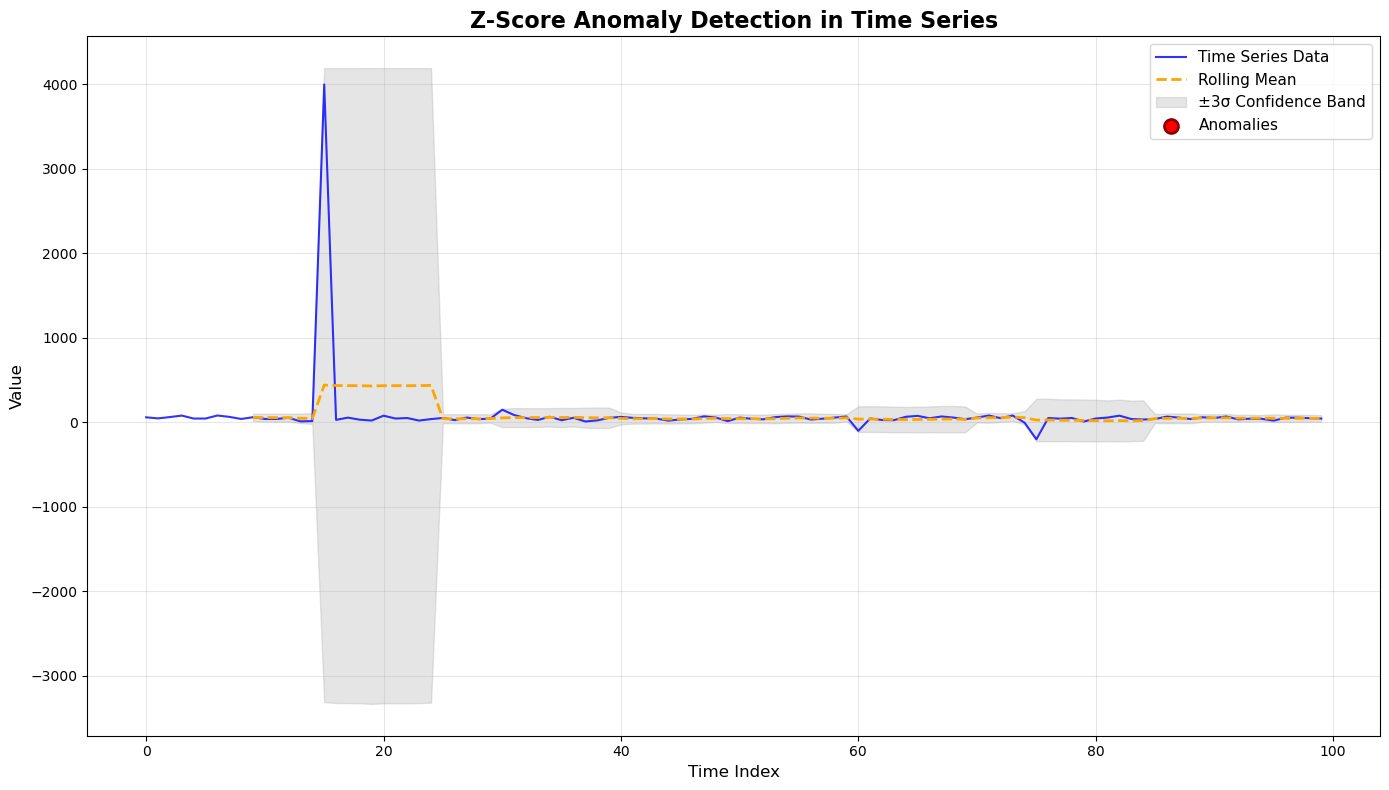

In [24]:
# Plot the results
plt.figure(figsize=(14, 8))

# Plot the time series data
plt.plot(df['Value'], label='Time Series Data', color='blue', linewidth=1.5, alpha=0.8)

# Plot the rolling mean
plt.plot(df['Rolling_Mean'], label='Rolling Mean', linestyle='--', color='orange', linewidth=2)

# Plot confidence bands (rolling mean ± threshold * rolling std)
upper_band = df['Rolling_Mean'] + threshold * df['Rolling_Std']
lower_band = df['Rolling_Mean'] - threshold * df['Rolling_Std']
plt.fill_between(df.index, upper_band, lower_band, alpha=0.2, color='gray', label=f'±{threshold}σ Confidence Band')

# Highlight anomalies with prominent red dots
anomaly_indices = df.index[df['Anomaly'] == 1]
anomaly_values = df['Value'][df['Anomaly'] == 1]
plt.scatter(anomaly_indices, anomaly_values, 
           color='red', s=100, marker='o', edgecolors='darkred', 
           linewidth=2, label='Anomalies', zorder=5)

# Add annotations for each anomaly
for idx, val in zip(anomaly_indices, anomaly_values):
    plt.annotate(f'Anomaly\n({idx}, {val:.1f})', 
                xy=(idx, val), xytext=(10, 10), 
                textcoords='offset points', 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'),
                fontsize=9, color='white', weight='bold')

plt.title('Z-Score Anomaly Detection in Time Series', fontsize=16, fontweight='bold')
plt.xlabel('Time Index', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
# Output the detected anomalies
anomalies = df[df['Anomaly'] == 1]
print("Anomalies detected at indices:", anomalies.index.tolist())


Anomalies detected at indices: []


# Explanation

Explanation of the Code:

    Data Simulation:

        We generate random data with a mean of 50 and a standard deviation of 20.

        We then inject two anomalies into the time series at indices 30 and 60.

    Rolling Mean and Std:

        We compute the rolling mean and rolling standard deviation using a window size of 10. You can adjust the window size depending on your time series' seasonality or periodicity.

    Z-Score Calculation:

        The Z-score is calculated as the difference between the value and the rolling mean, divided by the rolling standard deviation.

    Anomaly Detection:

        Points with an absolute Z-score greater than 3 are considered anomalies. We use this threshold to flag the anomalies.

    Plotting:

        The plot visualizes the time series, the rolling mean, and the detected anomalies. Anomalies are marked with red dots.

Output:

The output includes a plot with anomalies clearly marked, and the indices where anomalies are detected. The threshold for the Z-score can be adjusted based on how sensitive you want the anomaly detection to be.
Notes:

    Window Size: The window size for the rolling mean and standard deviation should be chosen based on the characteristics of your time series (e.g., if the data has strong seasonality, the window size should reflect that periodicity).

    Threshold Tuning: The threshold of 3 is a common default, but you may want to tune it based on your data and the level of anomaly detection sensitivity you desire.